In [167]:
from datetime import datetime
import itertools
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
plt.style.use('fivethirtyeight')

In [2]:
from iexfinance import get_historical_data
def get_iex_data(stock_list, start=datetime(2013,9,25), end=datetime(2018,9,25)):
    return_list = []
    for i in stock_list:
        df = pd.DataFrame(get_historical_data(i, start, end, output_format='pandas'))
        df['ticker'] = i
        return_list.append(df)
    return return_list

## Import Data

In [3]:
hun_etfs = ['SPY','IVV','VTI','VOO','QQQ','VEA','EFA','IEFA','VWO','AGG','IJH','IEMG','IWM','IJR','VTV','IWF','IWD','VUG','BND','LQD','XLF','VNQ','VIG','EEM','GLD','VB','BSV','VO','TIP','VEU','IVW','DIA','XLK','VYM','VGT','VCSH','MDY','IWB','VCIT','XLV','IWR','XLE','DVY','USMV','EWJ','VGK','PFF','SCHF','SDY','RSP','XLY','ITOT','IVE','SCHX','HYG','SHV','VBR','EMB','SHY','VV','SCHB','XLI','BIV','VT','MBB','BNDX','IWS','VXUS','FLOT','IWO','IXUS','MINT','SCZ','MTUM','IWN','IAU','IGSB','TLT','JNK','AMLP','VOE','XLP','MUB','IWP','VBK','FDN','EZU','IBB','IEF','IWV','ACWI','EFAV','VHT','SCHA','VFH','SCHD','GDX','IJK','SPLV','BKLN']
#all_etfs = ['SPY','IVV','VTI','VOO','QQQ','AGG','IJH','IWM','IJR','VTV','IWF','IWD','VUG','BND','LQD','VNQ','XLF','VIG','VB','VO','BSV','TIP','XLK','IVW','VGT','VYM','DIA','VCSH','MDY','IWB','VCIT','XLV','IWR','DVY','XLE','USMV','PFF','SDY','RSP','HYG','ITOT','XLY','IVE','SHV','SCHX','VBR','XLI','SHY','VV','SCHB','BIV','MBB','IWS','IWO','FLOT','MINT','VBK','IWN','MTUM','JNK','IGSB','VOE','AMLP','MUB','IWP','FDN','XLP','TLT','IBB','IEF','IWV','VHT','SCHA','VFH','SCHD','IJK','SPLV','XLU','IEI','BKLN','IJT','VXF','VMBS','IJS','SCHG','GOVT','QUAL','VOT','IJJ','ITA','HDV','IGIB','SCHP','SCHM','VTIP','PRF','PGX','IUSG','SCHZ','XBI','OEF','KRE','SCHH','FNDX','SCHV','CWB','IUSV','NEAR','SPSB','XLB','FVD','DGRO','IYW','IYR','VDE','VDC','VIS','MGK','GSLC','TQQQ','FLRN','VLUE','NOBL','SPIB','SJNK','SHM','SPYG','FNDA','BIL','DON','VTEB','KBE','AMJ','VCR','XOP','VGSH','SHYG','SPAB','IHI','SCHR','VPU','SCHO','XLRE','VAW','TFI','SPHD','HYD','SPTM','VGIT','SSO','RPG','RWR','FTSM','ICF','QTEC','VCLT','SLYG','DGRW','FLGE','EMLP','VOOG','JPST','FTEC','FXL','IUSB','SDOG','IYH','FBT','DES','VONG','VRP','ISTB','BLV','MGV','PRFZ','SLYV','QLD','DLN','ONEQ','STIP','GVI','IYF','RYT','QDF','GBIL','FAS','HYLB','FBGX','TDTT','FXR','TBT','IYG','SPLG','VTWO','HYS','ITM','PDP','PZA','LMBS','SPSM','VONV','SUB','SPYV','FEX','MLPI','XAR','USMC','SOXX','MOAT','MGC','FNCL','USIG','PGF','XMLV','FDL','UPRO','FHLC','XSLV','FTXO','SLQD','SPHQ','PWV','PSCH','TILT','MDYG','SH','PKW','PTLC','BSCK','FXO','IPE','FXH','IYY','DSI','LRGF','REM','IWY','EZM','FPX','SLY','FTA','BSCJ','FTCS','BSJJ','ANGL','IWC','CFO','SPMD','VIOO','ITB','SPTL','JKE','IYE','IYJ','PPA','VOX','VXX','RWL','BSCL','JKD','VONE','RPV','IVOO','PHB','XNTK','FTC','DHS','IYC','FNX','MDYV','KBWB','SPXL','MLPA','TDTF','RDIV','BSJK','IHF','IYT','BAB','UYG','SDS','VOOV','PHO','IAT','CSM','IVOG','DTN','BSCM','CDC','STPZ','USRT','XHB','XRT','CORP','FYX','PEY','SUSA','IBDM','EES','XME','JKG','XHE','KIE','TECL','IBDL','XLG','IVOV','RYH','TNA','SPYD','BSCI','FDIS','MDIV','XLC','PSK','IBDK','PWB','RDVY','SOXL','VUSE','CFA','AMZA','PTMC','VGLT','ONEO','PNQI','RFG','DTD','EDV','FREL','IDU','IYM','LVHD','SQQQ','JPUS','BSJI','FENY','ITE','PJP','TLH','QQEW','SNLN','UVXY','IYZ','PFXF','IGLB','SPTS','MLPX','FFTY','RWJ','IYK','VIOG','HYMB','IGHG','TBF','RHS','VBND','FIDU','IEO','CSML','FLTR','IBDN','ICSH','UDOW','SCHK','TVIX','ONEV','JHML','JHMM','EQAL','MORL','FYC','SPXU','CLTL','BSJL','JKI','IHE','IBDO','ATMP','DWAS','PSCT','SMDV','JKL','ERX','FMB','DMRL','LABU','ROM','FXN','KBWY','DDM','ONEY','DIV','AGGY','FXD','REGL','VTHR','RYF','JKF','OUSA','VRIG','AGZ','VIOV','ULVM','SECT','SVXY','XPH','BSCN','QABA','RWK','FLQL','PSQ','TMV','QYLD','HYGH','CLRG','RZG','PSC','FUTY','FXG','XES','BIB','SHE','FIW','PTH','PBP','IBDH','USFR','FSTA','FXU','KBWD','IWX','QDEF','REZ','IBDQ','XSD','GIGB','VTWG','IAI','PXMG','PTNQ','SPLB','TZA','IEZ','CMBS','PBE','BSCO','SPYX','JKH','PFM','IBMI','RGI','AMU','PSJ','RYE','IBDP','SPXS','PSI','TIPX','HYZD','MUNI','FXZ','JUST','FNDB','SBIO','IBMH','JKJ','PSCF','CZA','USHY','FMAT','QID','UWM','PXLG','AGGP','BSJM','FNY','LQDH','HUSE','ICVT','RWM','LTPZ','BDCL','PUTW','KNOW','XTN','IG','DOG','SIZE','IBMK','EPS','VTWV','FAD','TFLO','JKK','IBMJ','BIZD','CSD','AIEQ','PKB','EUSA','ILTB','RZV','SMB','SDOW','QQQE','SMLV','RYJ','BFOR','DEF','MBG','AIRR','FLTB','SMLF','KBWR','LDUR','XTL','HYLD','HYHG','PWC','DEUS','ROUS','DYLS','CURE','FTSD','TPYP','SHYD','CATH','USLB','SPHB','RFFC','EQL','RTM','DVP','RXL','PTF','MVV','IWL','URTY','QLTA','MLN','JPHY','ZROZ','OMFL','PSCI','DIVC','CDL','RFDA','MORT','PLW','VIXY','IBDR','UITB','FCOM','PSL','RYU','XRLV','COWZ','OUSM','HYUP','NUAG','SCIU','USEQ','TMFC','FDM','HUSV','GUSH','URE','ZIV','SYLD','PFFD','PEJ','FAZ','DXD','DUSA','HYDW','XSW','TTAC','IBDS','LVHB','FCG','FNGU','HDGE','CSF','FRI','QVAL','PRN','WBIY','SJB','IBDC','PST','BSJN','LGLV','PAVE','GBF','DGRS','FQAL','RBUS','BSCP','KCE','RCD','XMPT','JPME','CAPE','MXDU','IAK','GVIP','DMRM','RFV','FIBR','PXE','DIG','PFIG','JPSE','EWMC','MLPC','PXSG','TMF','QUS','GNMA','VXXB','FDMO','IBML','PYZ','PXLV','FVAL','ESGU','ULST','XHS','PSCC','PXI','QQXT','MEAR','PSCD','QCLN','TTFS','FAB','TWM','BDCS','DWTR','IBCD','PWS','HYLV','TUZ','ROOF','FTVA','QMOM','PPLC','BEMO','TTT','PPTY','ENTR','GSEW','JHMT','HSPX','CCOR','PXQ','PEZ','PBJ','FFHG','ARCM','FDLO','MLPQ','MFUS','PXSV','SOXS','NFO','NUSC','FYT','USVM','SMMU','QARP','EXT','DFEN','JHMF','MBSD','MIDU','PSCU','FTHI','FALN','DTYS','CJNK','VFMF','XITK','KBWP','HTUS','SMHD','EQWL','USD','XWEB','CLIX','JHMH','PVI','HOLD','TERM','AGGE','USTB','GURU','SKOR','RISE','QLC','IBDD','SRTY','NULG','PBS','KRMA','RWW','LABD','FCOR','ACSI','DWAQ','PULS','TBX','RVNU','ZMLP','IGEB','IMTB','BTEC','ISMD','CNCR','HYND','UYM','JHSC','BSJO','NUMG','PSCE','VTC','BBRE','JSMD','DRIP','BSCQ','CSB','AGZD','FVL','TIPZ','AUSF','YMLP','BMLP','FNK','HYGV','GNAF','SPMO','FNGZ','DRN','NAIL','FNGO','JHMC','GSSC','LEAD','PXMV','USMF','NUMV','QDYN','SMMV','MLPY','NULV','SYG','MLPO','GHYB','BBC','JSML','NUBD','DMRS','FINU','IBCE','ENFR','SHAG','IBD','SPYB','REML','EWSC','DVYL','CBND','XSHQ','VAMO','CSA','DRSK','PUI','LFEQ','RETL','UMDD','RODI','SHYL','UST','QSY','MAGA','SUSB','IGBH','IMLP','WIL','VFVA','BYLD','PFI','MMTM','SYV','DWPP','BIBL','DPST','JHME','MLPZ','FTXL','DDIV','ETHO','DOD','SAA','FNG','ERY','BNDC','PXJ','UBIO','MRRL','BBP','VFMO','JMBS','UCC','FWDD','SPXB','NURE','MILN','JHMI','GASL','LMLP','FCTR','PSCM','AGND','FLBL','FMHI','BIS','JMOM','WMCR','JQUA','TECS','PRID','FLRT','MMIT','XUSA','ERM','PSR','HONR','NUSA','JMIN','JVAL','SYE','RORE','JHMS','JDIV','FNGD','PPMC','ESG','LKOR','SPVU','VLU','FLCO','PHDG','UXI','EQWS','JHMA','EQWM','BSCR','SKF','ALFA','JHMU','TAIL','OPER','UBT','IMFC','CALF','LSST','ESGL','PYPE','PBND','PFFR','MLPE','PSET','VQT','DHVW','YMLI','FTXN','BSJP','HTAB','TYO','RNLC','PZI','SRS','WMW','OSCV','DLBS','IPO','SEF','VFMV','DUG','IBMM','VIXM','TAPR','SUSC','PLCY','HDLV','SDYL','FLAG','EWRE','EASI','VFLQ','FMK','AMJL','DIVO','EPRF','TUSA','DRV','MMIN','ULBR','CWS','PY','VFQY','HYDB','XDIV','PRB','GUDB','DJD','WREI','SMMD','KNG','PMPT','SPDV','UTES','UPW','FTLB','GARD','VXZ','VSMV','VIIX','MCEF','OMFS','ACT','IHYD','IHYV','PMR','TAXF','CUMB','LDRI','KORP','XSHD','HMOP','RINF','FLLV','SWIN','BUZ','ESML','FLDR','DESC','SPDN','BTAL','RALS','XVZ','PPSC','DYB','VXZB','MYY','SFHY','AMCA','HYXE','DVOL','LQDI','MLPG','VMIN','DVLU','MLPB','IGIH','MLQD','LLQD','FLQS','RNMC','XKFS','HNDL','UGE','EQRR','UTSL','VALQ','BDCZ','DIVB','TPOR','DUSL','VSDA','TETF','SPUU','REK','FLQM','SPXE','PPLN','FLMI','FMDG','FLMB','AMUB','QGRO','BOON','LBDC','DTUS','DFND','IIGD','IIGV','XKII','MOM','XKST','PMOM','BSCS','RVRS','MSUS','TYD','EDOW','IEHS','LRET','LVUS','FTXH','OMOM','OQAL','BVAL','OSIZ','IEDI','OVOL','IETC','SCAP','OVLU','IEME','IEIH','OYLD','TYBS','RPUT','PILL','IDIV','EMTY','PFFA','BSJQ','WFHY','JBRI','IEFN','DWSH','BOUT','SFIG','WFIG','RNSC','DFVS','HYIH','ESGS','DTYL','SQLV','RNDV','BJUL','ICAN','GASX','SMN','QVM','SDVY','DLBL','MIDZ','DFVL','SDP','HOML','SCTO','BOSS','SMLL','PVAL','CHGX','XTH','FTXR','PJUL','UJUL','IECS','DTUL','HYDD','YESR','SBB','OEW','UDBI','SSG','UJB','LOGO','MZZ','SAGG','DWMC','PBSM','FLAT','SPVM','PBUS','ZBIO','VETS','RTL','IFRA','SPXT','BUY','SRVR','SZNE','QDIV','NTSX','INDS','REW','PEXL','SLT','IUS','IUSS','STPP','PPTB','DLBR','PBTP','FTXD','DIVA','WDRW','SZK','NACP','WOMN','SIZ','SDD','SIJ','SBM','SMDD','OVLC','DDG','SPXV','SPXN','BERN','SPMV','TYNS','GMFL','FINZ','CHEP','LTL','SCC','VESH','EEH','FTXG','RXD','VSL','FRLG']

In [4]:
data = get_iex_data(hun_etfs)

In [105]:
def clean_data(data):
    for i in range(len(data)):
        data[i] = data[i].reset_index()
        data[i]['date'] = pd.to_datetime(data[i]['date'])
        data[i] = data[i].set_index('date')
    return data

In [130]:
data = clean_data(data)

In [131]:
ts = data[0]['close']

## ARIMA analysis

In [6]:
# p = d = q = range(0,3)
# pdq = list(itertools.product(p,d,q))
# pdqs = [(x[0], x[1], x[2], 5) for x in list(itertools.product(p, d, q))]
# ans = []
# for comb in pdq:
#     for combs in pdqs:
#         try:
#             mod = sm.tsa.statespace.SARIMAX(ts,
#                                             order=comb,
#                                             seasonal_order=combs,
#                                             enforce_stationarity=False,
#                                             enforce_invertibility=False)

#             output = mod.fit()
#             ans.append([comb, combs, output.aic])
#             print('ARIMA {} x {} : AIC Calculated ={}'.format(comb, combs, output.aic))
#         except:
#             continue    

In [7]:
# ans_df = pd.DataFrame(ans, columns=['pdq', 'pdqs', 'aic'])
# ans_df.loc[ans_df['aic'].idxmin()]

In [110]:
ARIMA_model = sm.tsa.statespace.SARIMAX(ts,
                                order=(2, 2, 2),
                                seasonal_order=(0, 0, 2, 5),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
output = ARIMA_model.fit()
print(output.summary().tables[1])


                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7660      0.134     -5.713      0.000      -1.029      -0.503
ar.L2         -0.0851      0.018     -4.773      0.000      -0.120      -0.050
ma.L1         -0.2570      1.614     -0.159      0.874      -3.421       2.907
ma.L2         -0.7431      1.184     -0.628      0.530      -3.063       1.577
ma.S.L5       -0.0583      0.025     -2.314      0.021      -0.108      -0.009
ma.S.L10      -0.0355      0.023     -1.567      0.117      -0.080       0.009
sigma2         2.5605      4.079      0.628      0.530      -5.435      10.556


/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


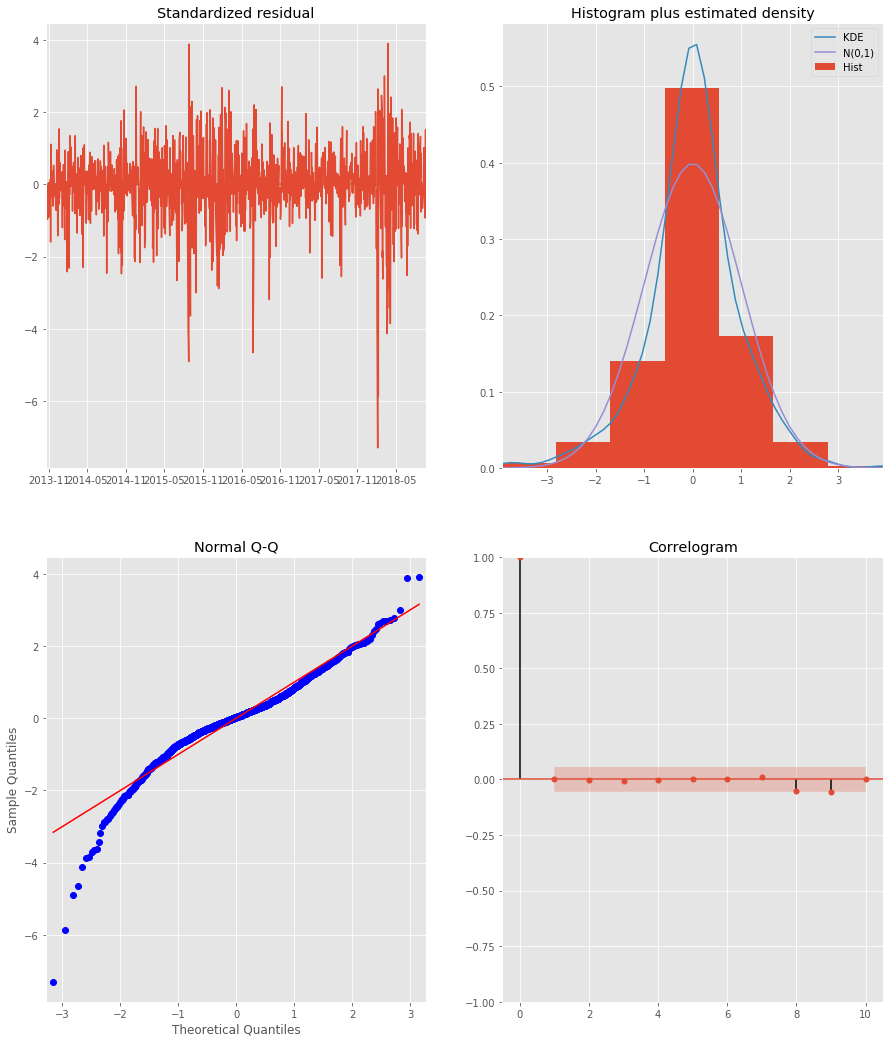

In [111]:
output.plot_diagnostics(figsize=(15, 18))
plt.show()

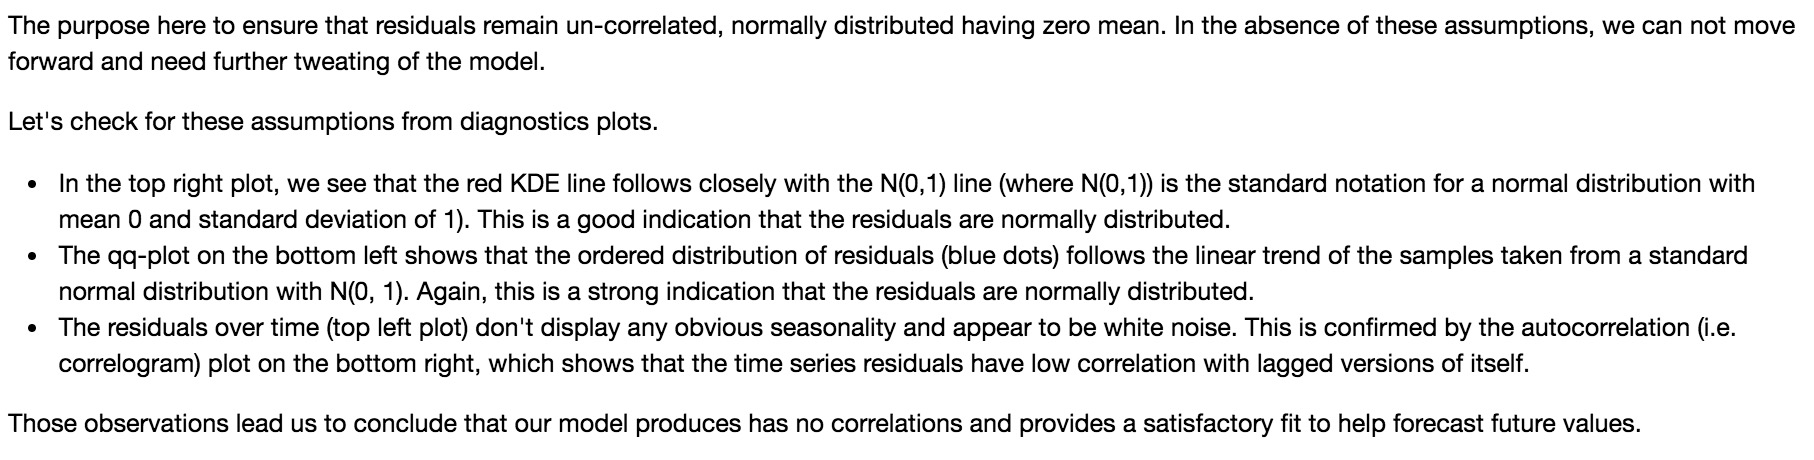

In [112]:
pred = output.get_prediction(start=pd.to_datetime('2018-08-01'), dynamic=False)
pred_conf = pred.conf_int()

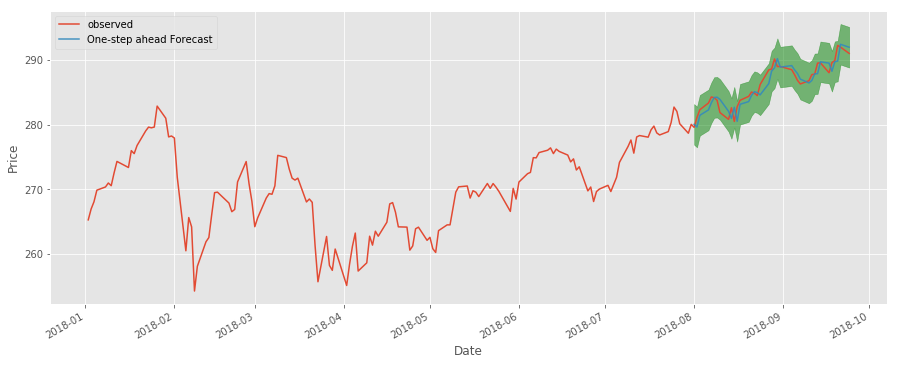

In [116]:
rcParams['figure.figsize'] = 15, 6

#Plot observed values
ax = ts['2018':].plot(label='observed')

#Plot predicted values
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.9)

#Plot the range for confidence intervals
ax.fill_between(pred_conf.index,
                pred_conf.iloc[:, 0],
                pred_conf.iloc[:, 1], color='g', alpha=.5)

#Set axes labels
ax.set_xlabel('Date')
ax.set_ylabel('Price')
plt.legend()

plt.show()

In [117]:
price_forecasted = pred.predicted_mean
price_truth = ts['2018-08-01':]

# Compute the mean square error
mse = ((price_forecasted - price_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 1.39


In [118]:
pred_dynamic = output.get_prediction(start=pd.to_datetime('2018-08-01'), dynamic=True, full_results=True)
pred_dynamic_conf = pred_dynamic.conf_int()

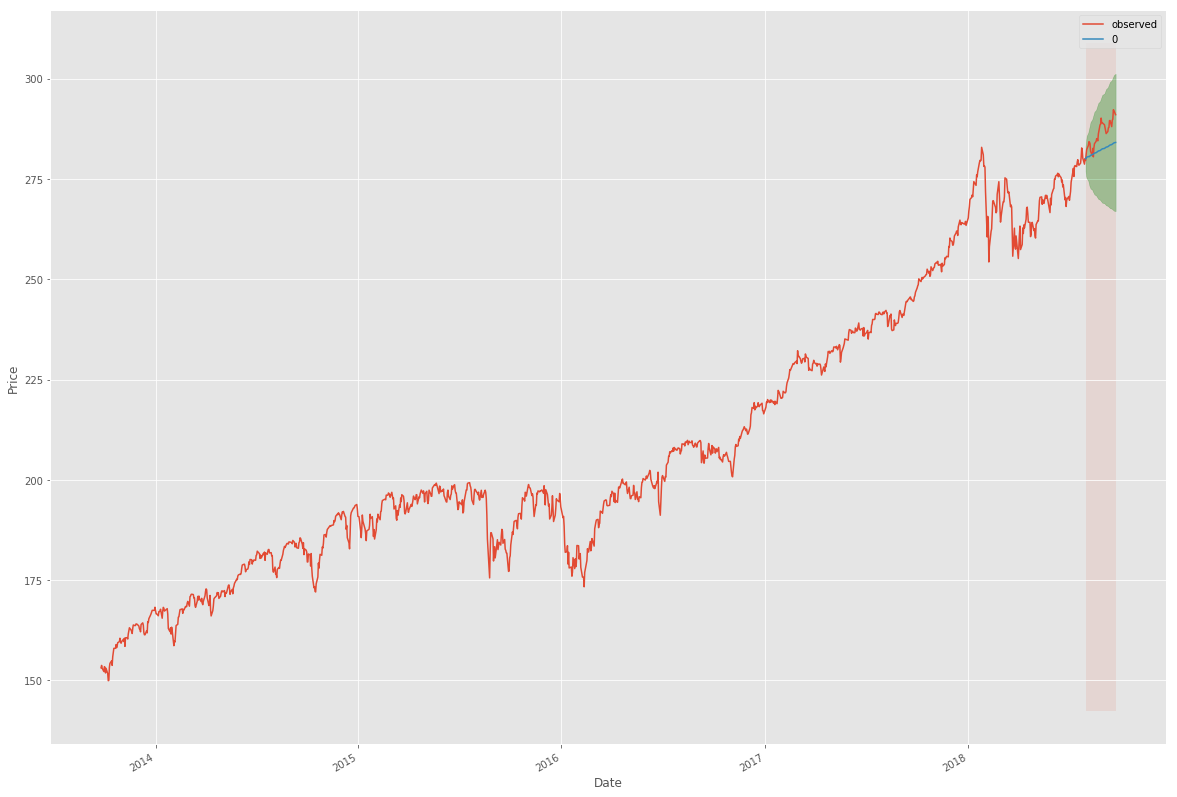

In [120]:
ax = ts['2013':].plot(label='observed', figsize=(20, 15))
datum.plot(label='Dynamic Forecast', ax=ax)

ax.fill_between(pred_dynamic_conf.index,
                pred_dynamic_conf.iloc[:, 0],
                pred_dynamic_conf.iloc[:, 1], color='g', alpha=.3)

ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('2018-08-01'), price_forecasted.index[-1], alpha=.1, zorder=-1)

ax.set_xlabel('Date')
ax.set_ylabel('Price')

plt.legend()
plt.show()

In [121]:
price_forecasted = pred_dynamic.predicted_mean
price_truth = ts['2018-08-01':]

# Compute the mean square error
mse = ((price_forecasted - price_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 22.1


In [124]:
# prediction = output.get_forecast(steps=50)

# # Get confidence intervals of forecasts
# pred_conf = prediction.conf_int()

## FBProphet for Future

In [146]:
from fbprophet import Prophet as proph
spy = pd.DataFrame(data[0]['close']).reset_index()
spy.columns = ['ds', 'y']

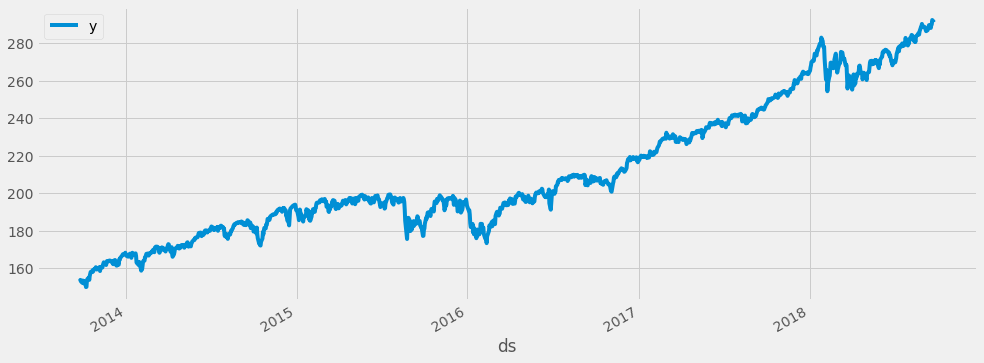

In [154]:
spy.set_index('ds').plot()

In [197]:
p = proph(interval_width=.95)
p.fit(spy)
inp = p.make_future_dataframe(periods=30, freq='D')
out = p.predict(inp)

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/anaconda3/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [160]:
df = out[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

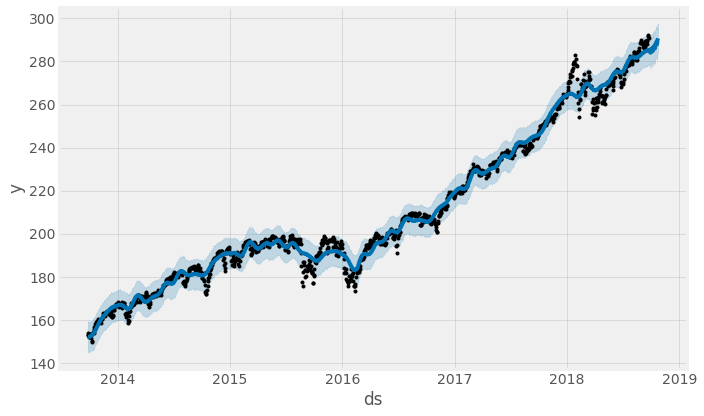

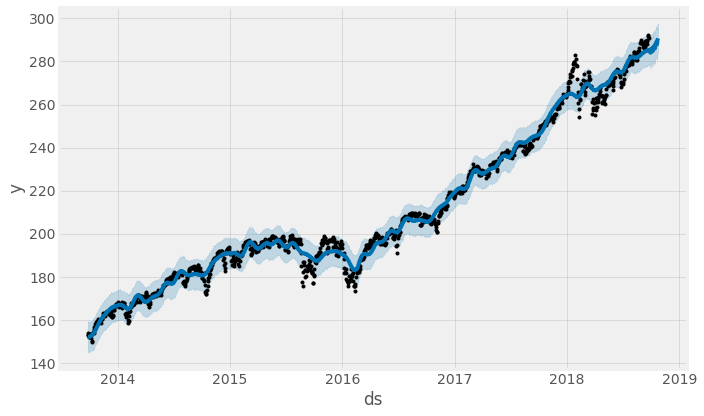

In [161]:
p.plot(df)

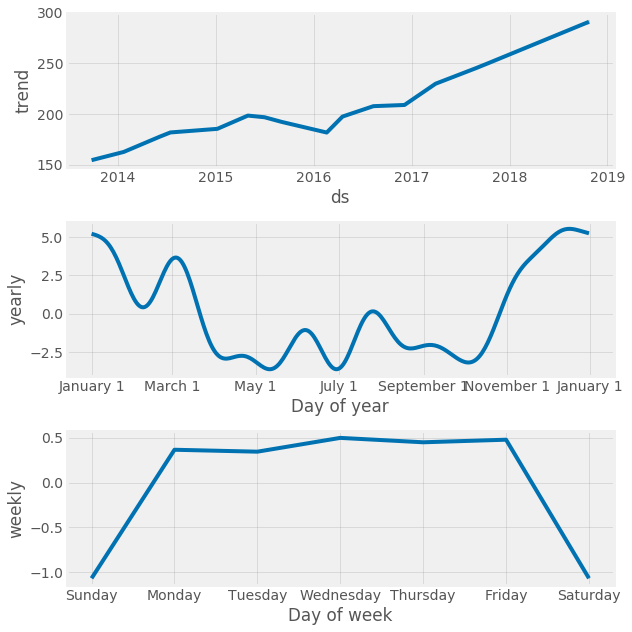

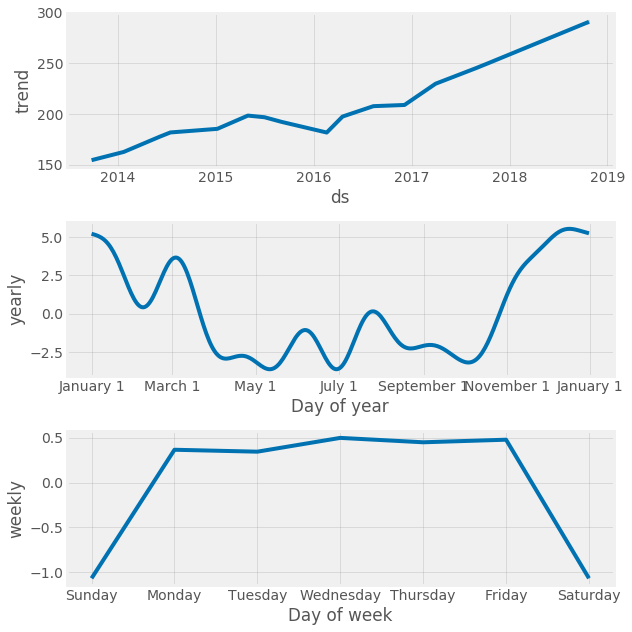

In [162]:
p.plot_components(out)

In [234]:
split = pd.to_datetime('2018-09-01')
true = spy.set_index('ds')[split:]
past = spy.set_index('ds')[:split].reset_index()

In [230]:
pro = proph(interval_width=.95)
pro.fit(past)
inp = pro.make_future_dataframe(periods=20, freq='D').set_index('ds')[split:].reset_index()
out = pro.predict(inp)

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/anaconda3/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [217]:
pred = out[['ds', 'yhat']].set_index('ds')